In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import warnings
warnings.simplefilter('ignore')
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

# Business Understanding


## Overview
Adidas, a leading global sportswear brand, aims to enhance customer engagement and drive sales in Great Britain by leveraging data-driven strategies. The company recognizes the need to better understand its diverse customer base and provide personalized experiences that cater to individual preferences. This project focuses on developing a customer segmentation and recommendation system that will allow Adidas to deliver tailored product recommendations based on the specific sports categories that customers are interested in.

## Problem Statement 
With a vast and diverse customer base in Great Britain, Adidas faces the challenge of effectively engaging with its customers across different sports categories. The current approach lacks the granularity needed to provide personalized experiences, leading to missed opportunities for increasing customer loyalty and driving sales. There is a need for a system that can accurately segment customers and deliver relevant product recommendations that resonate with their interests and behaviors.


## Challenges
1. Customer Segmentation: Develop a robust segmentation model that categorizes customers based on their purchasing behavior, particularly focusing on the sports categories they engage with.

2. Personalized Recommendations: Build a recommendation system that suggests products aligned with the identified customer segments, enhancing the shopping experience and driving sales.

3. Integration and Deployment: Integrate the recommendation system with a customer-facing platform, such as a website, ensuring seamless interaction and personalized user experiences.

4. Scalability: Ensure that the system is scalable to handle the diverse range of products and customer behaviors across all of Adidas's offerings.

## Proposed Solution
1. Data Integration: Combine customer demographic, sales, and engagement data to create a comprehensive dataset that captures all relevant information for segmentation and recommendations.

2. Customer Segmentation: Utilize machine learning techniques to segment customers based on the sports categories they purchase from, along with other relevant factors such as age, gender, and engagement scores.

3. Recommendation System: Implement a hybrid recommendation system that combines collaborative filtering and content-based filtering to provide personalized product recommendations for each customer segment.

4. Deployment: Develop a Flask API to serve the recommendation engine and integrate it with a customer-facing platform, such as a website, for real-time interaction with users.

## Success Metrics 
1. Model Accuracy: Maintain an overall model accuracy rate of 80% or higher in predicting user preferences.

2. Functional Storefront: Ensure the website accurately simulates a real e-commerce platform, showcasing product recommendations with names and descriptions.

3. Model Integration: Successfully integrate the recommendation model into the website, allowing it to dynamically generate and display personalized product suggestions for each user.


## Conclusion
By focusing on customer segmentation based on sports categories and providing personalized product recommendations, Adidas can significantly enhance customer engagement and drive sales in Great Britain. This project aims to build a scalable and accurate system that not only improves the shopping experience for customers but also provides valuable insights into customer behavior, enabling Adidas to tailor its marketing and product strategies more effectively.



# Data Understanding

## Data sources 
There are three datasets that will be used:
- (ConsTable_EU.csv), that contains consumer information.

- (SalesTable_EU.csv), that contains Sales information.

- (EngagementTable_GB.csv) that contains data on customer engagement for Great Britain.

In [2]:
# Load all datasets
cons_eu = pd.read_csv('data/ConsTable_EU.csv')
sales_eu = pd.read_csv('data/SalesTable_EU.csv')
engagement_gb = pd.read_csv('data/EngagementTable_GB.csv')


In [3]:
# Consumer Information
print('Consumer Information'.center(50, '-'))
print(f'Shape: {cons_eu.shape}')
print(f'Info:\n{cons_eu.info()}')
print(f'Description:\n{cons_eu.describe()}')

print('\n' + '-'*50 + '\n')

# Sales
print('Sales'.center(50, '-'))
print(f'Shape: {sales_eu.shape}')
print(f'Info:\n{sales_eu.info()}')
print(f'Description:\n{sales_eu.describe()}')

print('\n' + '-'*50 + '\n')

# Engagement Data
print('Engagement Data'.center(50, '-'))
print(f'Shape: {engagement_gb.shape}')
print(f'Info:\n{engagement_gb.info()}')
print(f'Description:\n{engagement_gb.describe()}')

---------------Consumer Information---------------
Shape: (355461, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355461 entries, 0 to 355460
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   acid                       355461 non-null  object 
 1   loyalty_memberid           266450 non-null  object 
 2   birth_year                 133642 non-null  float64
 3   consumer_gender            355461 non-null  object 
 4   market_name                355461 non-null  object 
 5   first_signup_country_code  355461 non-null  object 
 6   member_latest_tier         266335 non-null  object 
 7   member_latest_points       266335 non-null  float64
dtypes: float64(2), object(6)
memory usage: 21.7+ MB
Info:
None
Description:
          birth_year  member_latest_points
count  133642.000000         266335.000000
mean     1987.942346            150.370961
std        13.421753           1241.023133
m

 1. **Consumer Information**
- **Shape**: (355,461 rows, 8 columns)
- **Key Columns**:
  - `acid`: Unique identifier for each consumer (non-null).
  - `loyalty_memberid`: Membership ID (missing for about 25% of consumers).
  - `birth_year`: Year of birth (available for about 38% of consumers).
  - `consumer_gender`, `market_name`, `first_signup_country_code`: Demographic and location data.
  - `member_latest_tier`, `member_latest_points`: Loyalty program data, available for around 75% of consumers.
- **Notable Statistics**:
  - `birth_year`: Average year of birth is ~1988, with a range from 1882 to 2009.
  - `member_latest_points`: Points range widely, with some negative values and a max of 377,850.4 points.

 2. **Sales Data**
- **Shape**: (178,334 rows, 20 columns)
- **Key Columns**:
  - `acid`, `order_no`, `order_date`: Order identifiers and dates (non-null).
  - `market_name`, `country`: Geographic data.
  - `quantity_ordered`, `quantity_returned`, `quantity_cancelled`, `quantity_delivered`: Metrics on order fulfilment.
  - `exchange_rate_to_EUR`, `order_item_unit_price_net`: Financial data related to orders.
- **Notable Statistics**:
  - `quantity_ordered`: Average slightly above 1 item per order.
  - `quantity_returned`: 21% of items are returned on average.
  - `order_item_unit_price_net`: Prices range from -€45.76 to €14,628.10, indicating some anomalies.

 3. **Engagement Data**
- **Shape**: (33,148 rows, 29 columns)
- **Key Columns**:
  - `acid`: Consumer ID.
  - `year`, `quarter_of_year`, `month_of_year`, `week_of_year`: Temporal data for tracking engagement.
  - Various `freq_*` columns: Metrics capturing the frequency of consumer interactions (e.g., signups, app usage, purchases).
- **Notable Statistics**:
  - `freq_signup`, `freq_sportsapp`, `freq_email`, etc.: Majority of engagement metrics have low averages, indicating most consumers interact sporadically.
  - `freq_dotcom`, `freq_flagshipapp`: Show more consistent engagement, with some consumers interacting very frequently (e.g., up to 399 times on the flagship app).


# DATA PREPARATION

In [4]:
# Accessing GB Data from Cons_eu and Sale_eu

cons_gb = cons_eu[cons_eu['first_signup_country_code'] == 'GB']
sales_gb = sales_eu[sales_eu['country'] == 'GB']

In [5]:
cons_gb

,acid,loyalty_memberid,birth_year,consumer_gender,market_name,first_signup_country_code,member_latest_tier,member_latest_points
1,H24SNEP4HNBA6KVC,NaN,NaN,Unknown,Western Europe,GB,NaN,NaN
2,OUU8CGXKA9WIL7LW,NaN,NaN,Unknown,Western Europe,GB,NaN,NaN
4,LTZVC7YMPXJGLKOW,92D6786B8DB74C2984E382B5E99F5C393588563F269F62...,NaN,Male,Western Europe,GB,Level 1,0.0
8,LVCIKJXEH56NKV7A,29B11577BABDB20529C1D400FDC621824C83D6256F96D4...,NaN,Unknown,Western Europe,GB,Level 1,0.0
10,Z1AOUCZ2VG2FQ3UQ,5E00B3036468BEDCAA8BDAEEAAC9CFC2BAEAF4C09F4267...,NaN,Unknown,Western Europe,GB,Level 1,0.0
...,...,...,...,...,...,...,...,...
355440,UT1RW39PZACT2BD3,NaN,NaN,Unknown,Western Europe,GB,NaN,NaN
355442,PDQUJIFM3L6HPOPM,NaN,NaN,Unknown,Western Europe,GB,NaN,NaN
355444,1TQICCC4WUN38C9B,DBAD013F2B8C5E2593CD88E51A492B1A3E5D24918EC297...,NaN,Male,Western Europe,GB,Level 1,0.0
355446,C8ZGDRZN28M5N7SA,40663F074DC4CC74E8AAF58468A07BB1894B7A4A71EF41...,NaN,Male,Western Europe,GB,Level 1,0.0


In [6]:
sales_gb

,acid,order_no,order_date,market_name,country,article_no,key_category_descr,sports_category_descr,product_division,product_type,product_age_group,product_gender,quantity_ordered,quantity_returned,quantity_cancelled,quantity_delivered,no_of_items_after_returns,currency,exchange_rate_to_EUR,order_item_unit_price_net
1,LE9L3EOB8US4OCNM,AUK51130901,2022-06-09 00:00:00+00:00,Western Europe,GB,HB6519,TRAINING APP,TRAINING,APPAREL,SHORTS,ADULT,MEN,7,0,0,7,7,GBP,1.176471,12.537143
13,XNHKABE0B9HBQ9UB,AUK58840020,2022-11-26 00:00:00+00:00,Western Europe,GB,GZ0619,RUNNING FTW,RUNNING,FOOTWEAR,SHOES (LOW),ADULT,WOMEN,1,0,0,1,1,GBP,1.176471,44.380000
14,BQPEN1MTYSPZ8UJI,AUK55004486,2022-09-02 00:00:00+00:00,Western Europe,GB,HL9057,ORIGINALS APP,ORIGINALS,APPAREL,SWEATSHIRT,ADULT,WOMEN,1,0,0,1,1,GBP,1.176471,44.330000
15,LB5Q806DN5B2C34V,AUK53592920,2022-07-31 00:00:00+00:00,Western Europe,GB,GW2962,ORIGINALS FTW,ORIGINALS,FOOTWEAR,SHOES (LOW),ADULT,MEN,1,0,0,1,1,GBP,1.176471,54.160000
16,YFRSHW5AXP0F1VC3,AUK58715695,2022-11-25 00:00:00+00:00,Western Europe,GB,GN1990,TRAINING ACC HW,NOT SPORTS SPECIFIC,ACCESSORIES/HARDWARE,CAP,ADULT,MEN,1,0,0,1,1,GBP,1.176471,4.790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178322,5DTX7N77YSTINSR3,AUK58640550,2022-11-24 00:00:00+00:00,Western Europe,GB,GX9527,ORIGINALS FTW,ORIGINALS,FOOTWEAR,SHOES (LOW),ADULT,MEN,1,0,0,1,1,GBP,1.176471,61.100000
178326,Z6J9Z1BLG8C8EMY0,AUK58954873,2022-11-27 00:00:00+00:00,Western Europe,GB,HF1488,FOOTBALL APP LICENSED,FOOTBALL/SOCCER,APPAREL,JERSEY,JUNIOR,KIDS,1,0,1,0,0,GBP,1.176471,50.000000
178329,57U8ESPG67OD3YZW,AUK50152075,2022-05-10 00:00:00+00:00,Western Europe,GB,GW8731,SPORTSWEAR FTW KIDS,RUNNING,FOOTWEAR,SHOES (LOW),KIDS,KIDS,1,1,0,1,0,GBP,1.176471,29.750000
178330,8E5RYMR4XQ6IK8O4,AUK47690042,2022-03-06 00:00:00+00:00,Western Europe,GB,H09117,ORIGINALS APP,ORIGINALS,APPAREL,TRACK PANT,ADULT,MEN,1,1,0,1,0,GBP,1.176471,40.830000


In [7]:
engagement_gb

,acid,country,year,quarter_of_year,month_of_year,week_of_year,freq_signup,freq_sportsapp,freq_survey,freq_raffle,...,freq_confirmed,freq_dotcom,freq_flagshipapp,freq_hype,freq_pdp,freq_plp,freq_add_to_cart,freq_preference,freq_wishlist,refresh_date
0,W884Q2CXMZIUPJAY,GB,2022,4,10,43,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2024-03-04
1,SK35CN4PN3D8BSQ5,GB,2022,4,11,44,0,0,0,0,...,2,0,0,0,0,0,0,0,0,2024-03-04
2,PEFUFIL9L91LWRCH,GB,2022,4,11,44,0,0,0,0,...,0,0,1,0,1,1,0,0,0,2024-03-04
3,L3C6LK6TNPV7TU4T,GB,2022,4,10,43,0,0,0,0,...,0,0,4,0,4,4,0,0,0,2024-03-04
4,ZLJNMTPZ5A03AEYN,GB,2022,4,10,41,0,0,0,0,...,0,0,18,0,3,15,0,0,0,2024-03-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33143,IESJHC6LUJOAXD06,GB,2022,4,10,42,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2024-03-04
33144,EJ1306ROWJ5K7XF3,GB,2022,4,10,40,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2024-03-04
33145,BUARMZA5098MXY54,GB,2022,4,11,47,0,0,0,0,...,0,0,2,0,2,0,2,0,2,2024-03-04
33146,KU52VB7B0C15I26S,GB,2022,4,12,51,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2024-03-04


In [8]:
# null values for each dataset
print(cons_gb.isnull().sum())

acid                             0
loyalty_memberid             18169
birth_year                   58280
consumer_gender                  0
market_name                      0
first_signup_country_code        0
member_latest_tier           18169
member_latest_points         18169
dtype: int64


In [9]:
#Fill missing loyalty data with 'Non-member'
cons_gb['loyalty_memberid'].fillna('Non-member', inplace=True)
cons_gb['member_latest_tier'].fillna('Non-member', inplace=True)
cons_gb['member_latest_points'].fillna(0, inplace=True)

#Filling missing birth_year with median age
median_birth_year = cons_gb['birth_year'].median()
cons_gb['birth_year'].fillna(median_birth_year, inplace=True)

#Convert birth_year to age
current_year = 2022
cons_gb['age'] = current_year - cons_gb['birth_year']

#Drop birth year column
cons_gb.drop('birth_year', axis=1, inplace=True)

In [10]:
# Checking null values
print(cons_gb.isnull().sum())

acid                         0
loyalty_memberid             0
consumer_gender              0
market_name                  0
first_signup_country_code    0
member_latest_tier           0
member_latest_points         0
age                          0
dtype: int64


In [11]:
# Checking for duplicates
print(cons_gb.duplicated().sum())

0


In [12]:
#Check for null values in the sales data
print(sales_gb.isnull().sum())

acid                          0
order_no                      0
order_date                    0
market_name                   0
country                       0
article_no                    0
key_category_descr            0
sports_category_descr         0
product_division              0
product_type                  0
product_age_group             0
product_gender                0
quantity_ordered              0
quantity_returned             0
quantity_cancelled            0
quantity_delivered            0
no_of_items_after_returns     0
currency                      0
exchange_rate_to_EUR          0
order_item_unit_price_net    23
dtype: int64


In [13]:
#Filling the misssing values with the median
sales_gb['order_item_unit_price_net'].fillna(sales_gb['order_item_unit_price_net'].median(),inplace=True)

In [14]:
#Checking null value
print(sales_gb.isnull().sum())

acid                         0
order_no                     0
order_date                   0
market_name                  0
country                      0
article_no                   0
key_category_descr           0
sports_category_descr        0
product_division             0
product_type                 0
product_age_group            0
product_gender               0
quantity_ordered             0
quantity_returned            0
quantity_cancelled           0
quantity_delivered           0
no_of_items_after_returns    0
currency                     0
exchange_rate_to_EUR         0
order_item_unit_price_net    0
dtype: int64


In [15]:
#Checking duplicates
print(sales_gb.duplicated().sum())

0


In [16]:
#Checking for missing values in Engagement data
print(engagement_gb.isnull().sum())

acid                       0
country                    0
year                       0
quarter_of_year            0
month_of_year              0
week_of_year               0
freq_signup                0
freq_sportsapp             0
freq_survey                0
freq_raffle                0
freq_reviews               0
freq_email                 0
freq_adiclub_email         0
freq_pn                    0
freq_adiclub_pn            0
freq_transactions          0
freq_earn_points           0
freq_points_redemption     0
freq_rewards_redemption    0
freq_confirmed             0
freq_dotcom                0
freq_flagshipapp           0
freq_hype                  0
freq_pdp                   0
freq_plp                   0
freq_add_to_cart           0
freq_preference            0
freq_wishlist              0
refresh_date               0
dtype: int64


In [17]:
#Checking duplicates
print(engagement_gb.duplicated().sum())

0


# Exploratory Data Analysis

## Univariate Analysis
#####    Consumer data


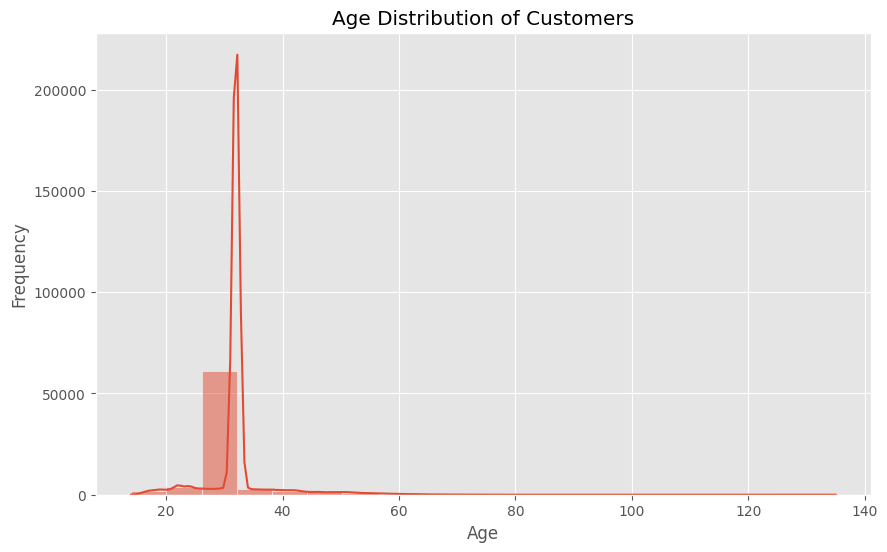

In [18]:
# Distribution of age 
plt.figure(figsize=(10, 6))
sns.histplot(cons_gb['age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The vast majority of customers are younger adults, likely between 20 and 30 years old. This could imply that the brand has a strong appeal to a younger demographic. The presence of customers aged over 100 suggests possible issues with data quality. It might be beneficial to clean the data by removing or investigating these outliers. Marketing strategies should focus on appealing to younger consumers, who form the bulk of our customer base.

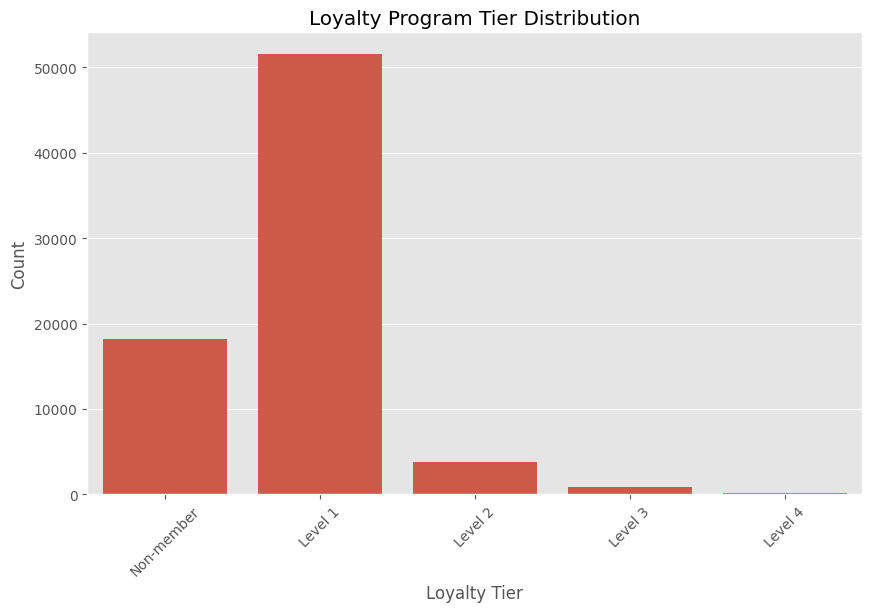

In [19]:
# Loyalty program membership distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='member_latest_tier', data=cons_gb)
plt.title('Loyalty Program Tier Distribution')
plt.xlabel('Loyalty Tier')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The sharp drop in the number of customers from "Level 1" to "Level 2" suggests that many customers do not advance beyond the initial level. This could imply that customers are either not incentivized enough to move up the loyalty tiers or that the requirements to advance are too stringent.
There is a significant portion of the customer base that is not part of the loyalty program. Strategies could be developed to convert these non-members into members, potentially increasing their engagement with the brand.
The very low numbers in "Level 3" and "Level 4" suggest that maintaining customer loyalty and engagement at these higher levels might be challenging. This could be an area for further analysis and strategy development to encourage more customers to progress through the tiers.
The current distribution might indicate that the loyalty program is effective at bringing in new members (as seen by the high numbers at "Level 1"), but there may be challenges in retaining and progressing these members through higher levels.

- Correlation Matrix

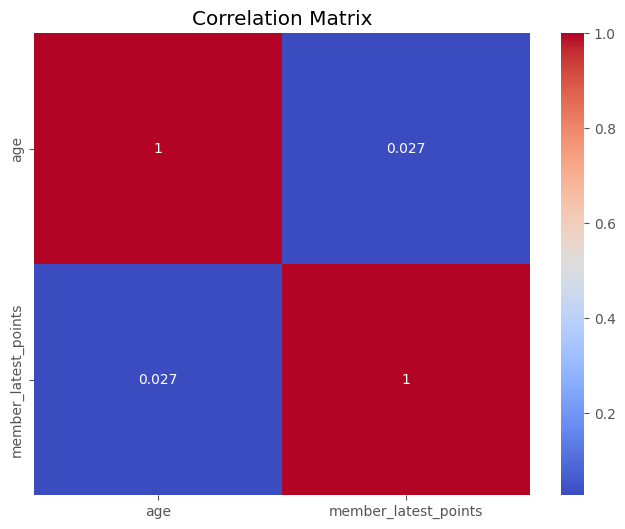

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cons_gb[['age', 'member_latest_points']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The very low correlation coefficient between age and member_latest_points suggests that a customer's age does not significantly influence the number of points they have in the loyalty program. This means that both younger and older customers tend to accumulate points at similar rates, and age is not a predictor of engagement or spending behavior in this context. Given the low correlation, age and member points can be considered largely independent in this dataset.

#####  Sales Data

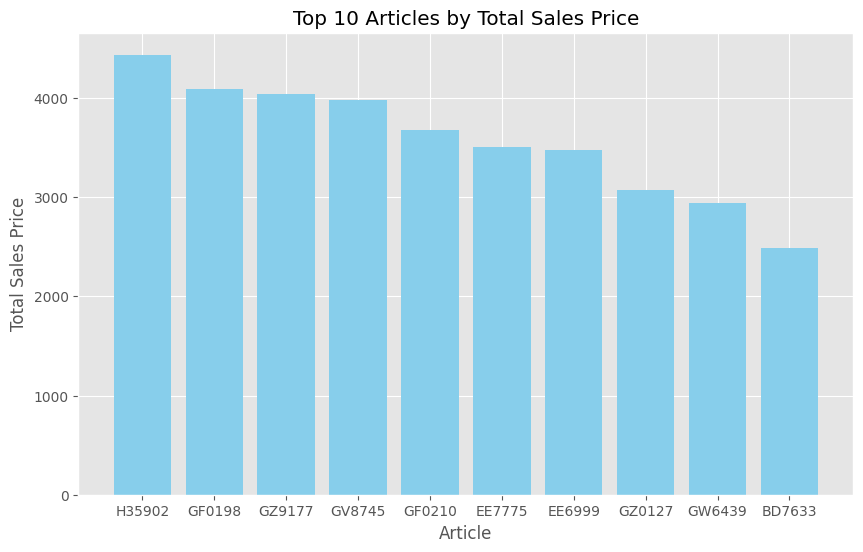

In [21]:
grouped_sales_gb = sales_gb.groupby('article_no').sum()

# Calculate the top 10 articles by total sales price: top_10_articles
top_10_articles = grouped_sales_gb.sort_values(by='order_item_unit_price_net', ascending=False).head(10)

# Plot the top 10 articles by total sales price
plt.figure(figsize=(10,6))
plt.bar(top_10_articles.index, top_10_articles['order_item_unit_price_net'], color='skyblue')
plt.xlabel('Article')
plt.ylabel('Total Sales Price')
plt.title('Top 10 Articles by Total Sales Price')
plt.show()

The chart indicates that a few articles generate the majority of sales revenue. The top articles like Men's football/soccer jersey, Men's Track top, and men's footwear are likely high-demand products.
This concentration of sales in a few products could suggest that these articles are either best-sellers due to their popularity, quality, or perhaps successful marketing campaigns.
Given the high sales volumes for these top articles, ensuring that these items are well-stocked and available could be crucial for maintaining sales momentum.
Conversely, analyzing why the lower-ranked articles are still in the top 10 but lag behind could reveal opportunities for optimization, such as targeted promotions or pricing strategies.
You might want to focus on these top articles when designing marketing strategies, special promotions, or product bundles since they are proven revenue drivers.

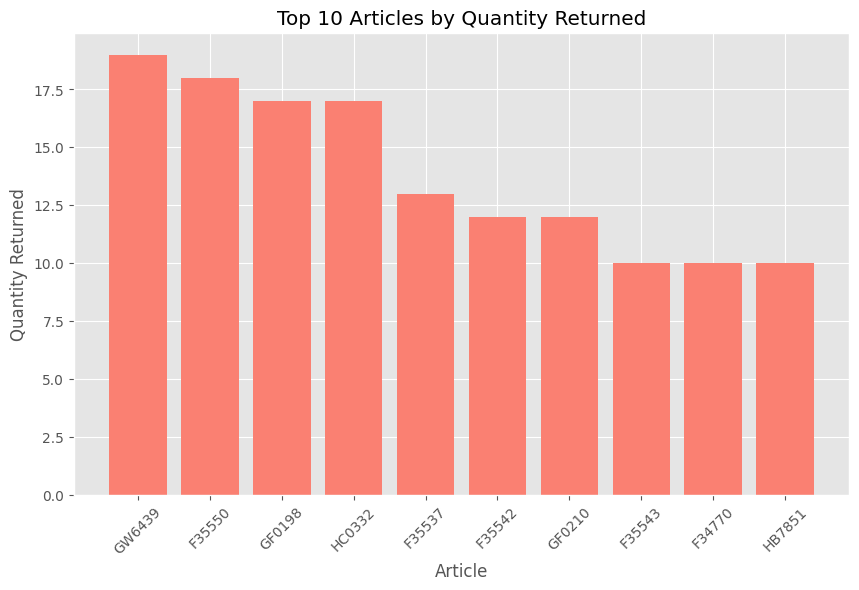

In [22]:
# Calculate the top 10 articles by quantity_returned: top_10_article_returns
top_10_article_returns = grouped_sales_gb.sort_values(by='quantity_returned', ascending=False).head(10)

# Plot the top 10 articles by quantity_returned
plt.figure(figsize=(10,6))
plt.bar(top_10_article_returns.index, top_10_article_returns['quantity_returned'], color='salmon')
plt.xlabel('Article')
plt.ylabel('Quantity Returned')
plt.title('Top 10 Articles by Quantity Returned')
plt.xticks(rotation=45)
plt.show()

The articles with the highest return rates might have quality issues, sizing problems, or other factors leading customers to return them. It's crucial to investigate why these specific articles have higher return rates.

High returns can indicate customer dissatisfaction, which can negatively impact brand reputation and profitability. The top-returned articles might be candidates for a closer examination to identify and address any underlying issues.

For articles like Kid's running shoes and Men's swimming slides, understanding the reasons behind the high return rates could provide insights into necessary product improvements, whether it’s related to product quality, size accuracy, or customer expectations.


Managing returns is costly. Identifying patterns in returned products can help in reducing return rates, optimizing logistics, and improving overall customer satisfaction.

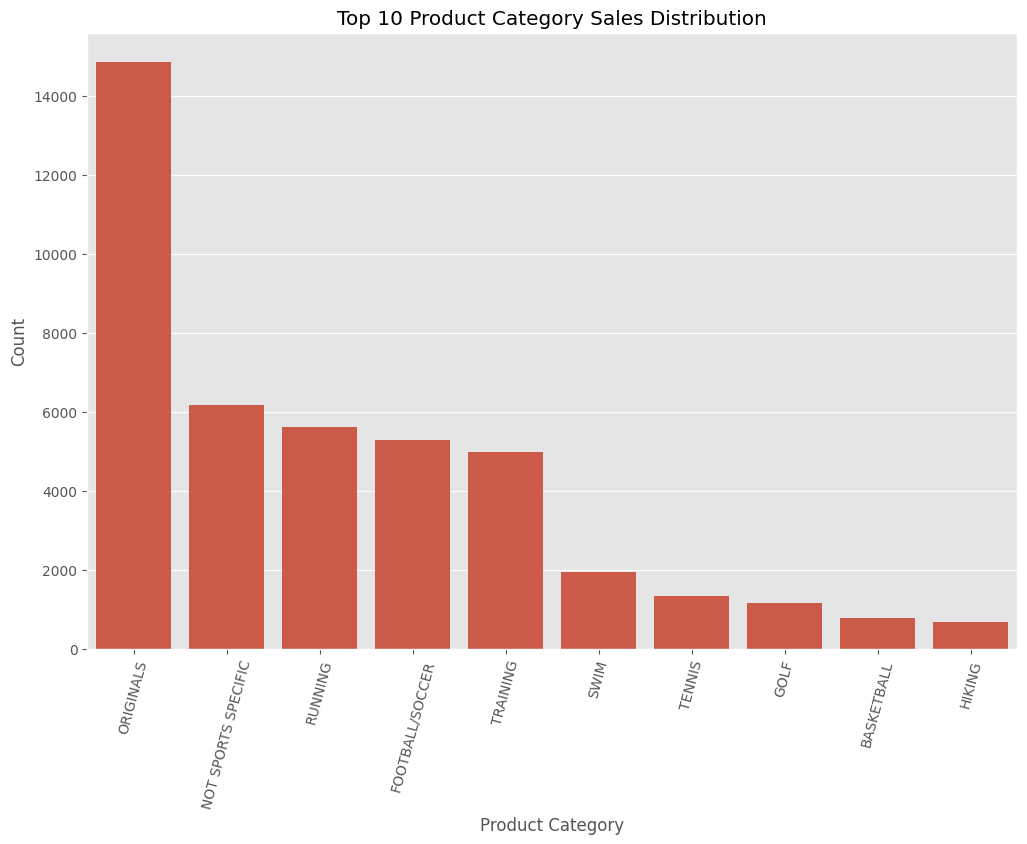

In [23]:
# Count the occurrences of each product category
top_product_categories = sales_gb['sports_category_descr'].value_counts().nlargest(10)

# Filter the sales_table to only include rows with these top categories
filtered_sales_table = sales_gb[sales_gb['sports_category_descr'].isin(top_product_categories.index)]

# Plot the distribution of the top 10 product categories
plt.figure(figsize=(12, 8))
sns.countplot(x='sports_category_descr', data=filtered_sales_table, order=top_product_categories.index)
plt.title('Top 10 Product Category Sales Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

The "ORIGINALS" category is the most dominant, suggesting that products in this category have a broad appeal, potentially across various demographics. This could be due to its association with lifestyle and fashion rather than specific sports.

"RUNNING" and "FOOTBALL/SOCCER" are the most popular sports-specific categories. This aligns with the high interest and participation in these activities globally, particularly football (soccer) in Europe.

The clear difference in sales volume across categories highlights opportunities for targeted marketing. For instance, while categories like "ORIGINALS" might benefit from broader, lifestyle-focused campaigns, more niche categories like "TENNIS" or "GOLF" may require specialized marketing strategies to reach their specific audiences.

Categories with lower sales counts, such as "HIKING" or "BASKETBALL," might have potential for growth. Understanding why these categories lag behind (e.g., limited product offerings, less marketing focus, or niche audience) could provide insights for strategic development.

#####  Engagement Data

In [24]:
# Feature Engineering Engagement Data to get Engagement Score
engagement_gb['engagement_score'] = engagement_gb['freq_signup'] + engagement_gb['freq_sportsapp'] + engagement_gb['freq_survey'] + engagement_gb['freq_raffle'] + engagement_gb['freq_reviews'] + engagement_gb['freq_email'] + engagement_gb['freq_adiclub_email'] +engagement_gb['freq_pn'] + engagement_gb['freq_adiclub_pn'] + engagement_gb['freq_transactions'] + engagement_gb['freq_earn_points'] +engagement_gb['freq_points_redemption'] + engagement_gb['freq_rewards_redemption'] + engagement_gb['freq_confirmed'] + engagement_gb['freq_dotcom'] +engagement_gb['freq_flagshipapp'] + engagement_gb['freq_hype'] + engagement_gb['freq_pdp'] + engagement_gb['freq_plp'] + engagement_gb['freq_add_to_cart'] +engagement_gb['freq_preference'] + engagement_gb['freq_wishlist']

In [25]:
engagement_gb.head()

,acid,country,year,quarter_of_year,month_of_year,week_of_year,freq_signup,freq_sportsapp,freq_survey,freq_raffle,...,freq_dotcom,freq_flagshipapp,freq_hype,freq_pdp,freq_plp,freq_add_to_cart,freq_preference,freq_wishlist,refresh_date,engagement_score
0,W884Q2CXMZIUPJAY,GB,2022,4,10,43,0,0,0,0,...,1,0,0,0,0,0,0,0,2024-03-04,3
1,SK35CN4PN3D8BSQ5,GB,2022,4,11,44,0,0,0,0,...,0,0,0,0,0,0,0,0,2024-03-04,2
2,PEFUFIL9L91LWRCH,GB,2022,4,11,44,0,0,0,0,...,0,1,0,1,1,0,0,0,2024-03-04,3
3,L3C6LK6TNPV7TU4T,GB,2022,4,10,43,0,0,0,0,...,0,4,0,4,4,0,0,0,2024-03-04,12
4,ZLJNMTPZ5A03AEYN,GB,2022,4,10,41,0,0,0,0,...,0,18,0,3,15,0,0,0,2024-03-04,36


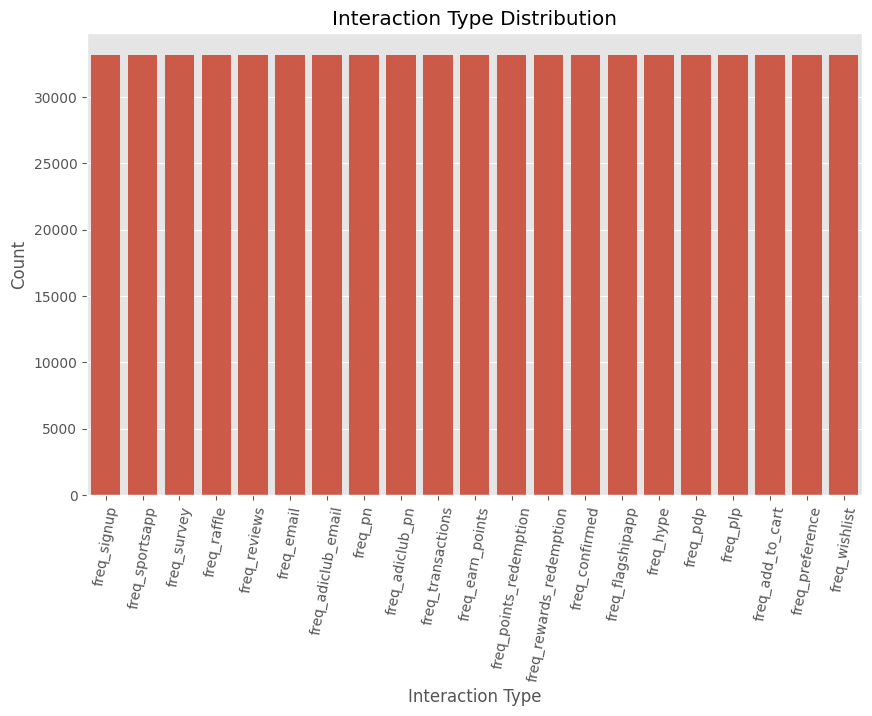

In [26]:
# Reshape the DataFrame to have interaction types in a single column
interaction_columns = ['freq_signup', 'freq_sportsapp', 'freq_survey', 'freq_raffle', 'freq_reviews', 'freq_email',
                       'freq_adiclub_email', 'freq_pn', 'freq_adiclub_pn', 'freq_transactions', 'freq_earn_points',
                       'freq_points_redemption', 'freq_rewards_redemption', 'freq_confirmed', 'freq_flagshipapp',
                       'freq_hype', 'freq_pdp', 'freq_plp', 'freq_add_to_cart', 'freq_preference', 'freq_wishlist']

# Convert to long format
engagement_melted = engagement_gb.melt(value_vars=interaction_columns, var_name='Interaction Type', value_name='Count')
# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Interaction Type', data=engagement_melted, order=interaction_columns)
plt.title('Interaction Type Distribution')
plt.xlabel('Interaction Type')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

The uniform distribution indicates that customers are engaging with the brand in a balanced way across multiple channels and activities. No single interaction type dominates, which suggests a well-rounded customer engagement strategy.

This balanced engagement could be the result of effective omnichannel strategies, where customers interact with the brand across various touchpoints consistently. This might include signing up, participating in surveys, reviewing products, and redeeming points.

Since all interaction types are equally frequent, it might be beneficial to maintain or even enhance this level of engagement across these channels. However, if the goal is to drive specific behaviors, focusing marketing efforts on underutilized interactions (if any existed) would be a potential strategy.


## Bivariate Analysis

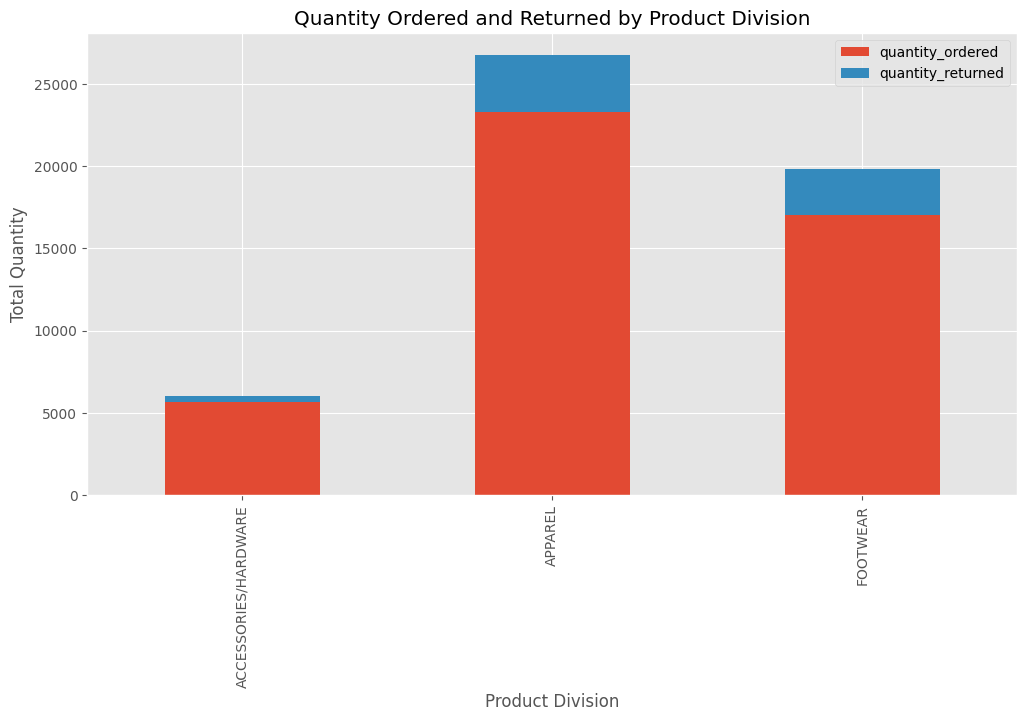

In [27]:
# Quantity ordered and returned by product division
quantity_by_division = sales_gb.groupby('product_division')[['quantity_ordered', 'quantity_returned']].sum().reset_index()
quantity_by_division.set_index('product_division').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Quantity Ordered and Returned by Product Division')
plt.xlabel('Product Division')
plt.ylabel('Total Quantity')
plt.show()

Apparel has the highest total orders among the three divisions, which is typical given that apparel usually encompasses a wide range of items like clothing, which tend to have higher purchase frequencies.

The significant portion of returns in the Apparel division suggests potential issues such as sizing, quality, or customer satisfaction. Apparel often has higher return rates due to fit and style preferences.

The Footwear division also shows a notable return rate, though it's less pronounced than Apparel. Footwear returns might be due to size, comfort, or product quality issues.

Accessories/Hardware shows the lowest return rate, which might indicate that these products are less prone to issues like sizing or style mismatches and are therefore more likely to meet customer expectations.

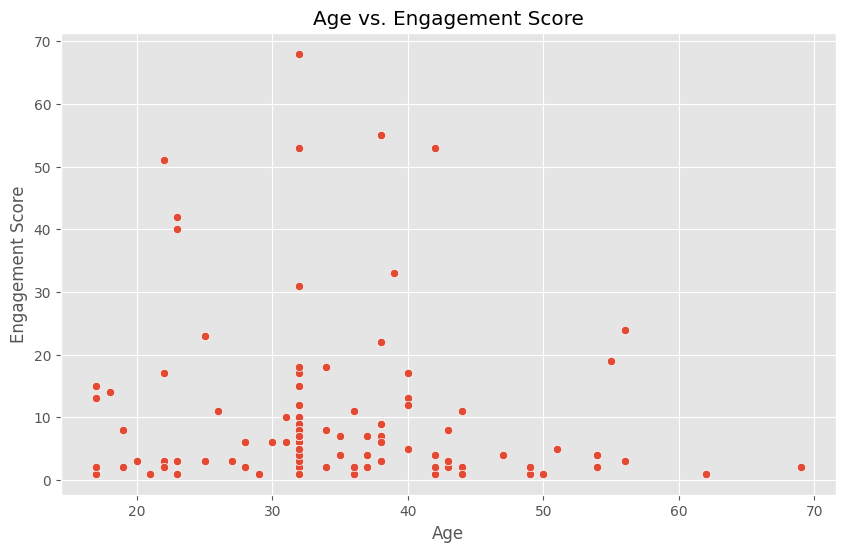

In [28]:
# Age versus Engagement Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='engagement_score', data=cons_gb.merge(engagement_gb, on='acid',how = 'outer'))
plt.title('Age vs. Engagement Score')
plt.xlabel('Age')
plt.ylabel('Engagement Score')
plt.show;

The scattered nature of the points indicates a weak or non-existent correlation between age and engagement score. This means that factors other than age are likely driving customer engagement.

Since high engagement is seen across various ages, this suggests that customers of different age groups can be highly engaged. This indicates that the brand's engagement strategies might be appealing to a broad age range, though there’s no specific age group that is distinctly more engaged.

The high concentration of low engagement scores, especially among customers in the 25-40 age range, suggests that there may be opportunities to increase engagement within this demographic. This might involve targeted campaigns or tailored content to boost their interaction with the brand.

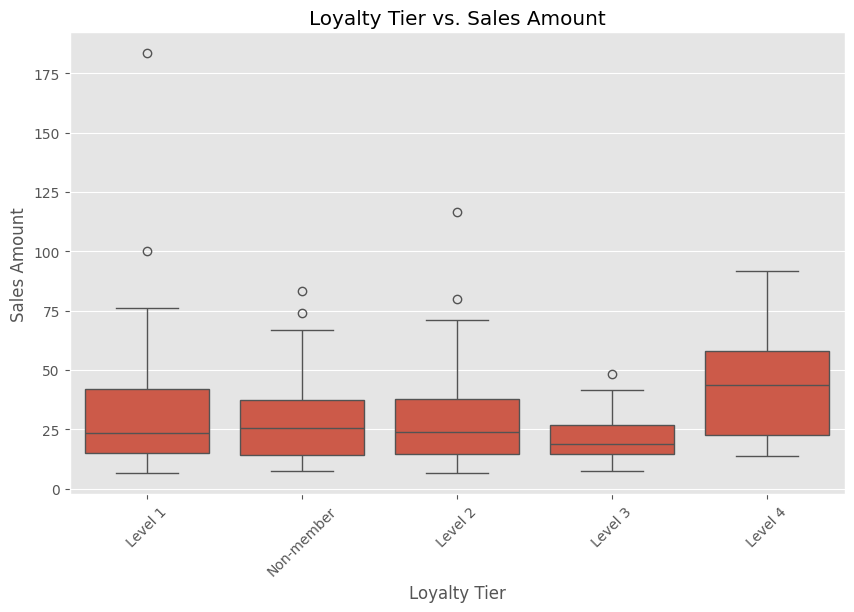

In [29]:
# Loyalty tier versus Sales Amount
merged_data = cons_gb.merge(sales_gb, on='acid', how = 'outer')

plt.figure(figsize=(10, 6))
sns.boxplot(x='member_latest_tier', y='order_item_unit_price_net', data=merged_data)
plt.title('Loyalty Tier vs. Sales Amount')
plt.xlabel('Loyalty Tier')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

Level 4 shows the highest median sales amount, suggesting that customers in this tier tend to spend more on average compared to those in other tiers.
Level 3 has the lowest median sales amount, with a narrower range of spending, indicating that customers at this level tend to spend less overall.
The other levels, including non-members, show moderate spending, with some outliers who have spent significantly more

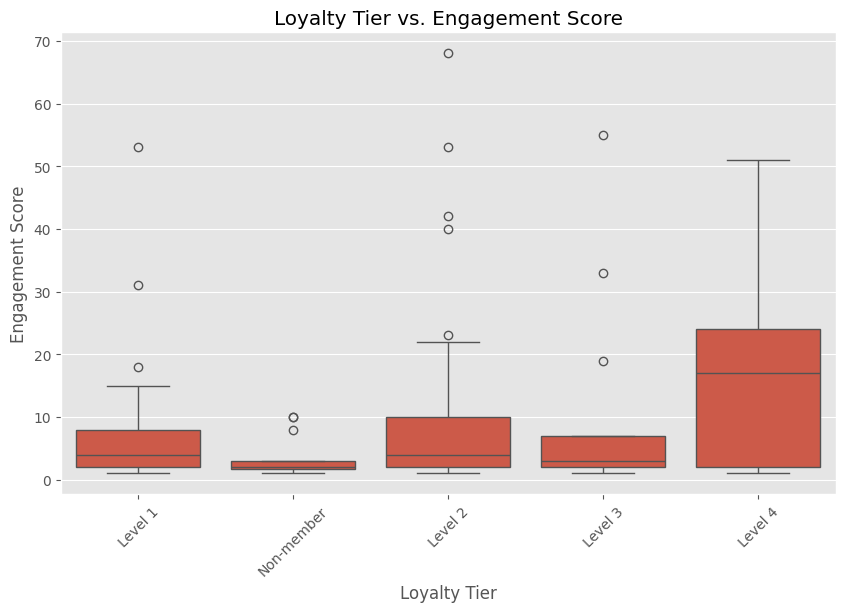

In [30]:
# Loyalty tier versus Engagement Score
merged_data = cons_gb.merge(engagement_gb, on='acid', how = 'outer')

plt.figure(figsize=(10, 6))
sns.boxplot(x='member_latest_tier', y='engagement_score', data=merged_data)
plt.title('Loyalty Tier vs. Engagement Score')
plt.xlabel('Loyalty Tier')
plt.ylabel('Engagement Score')
plt.xticks(rotation=45)
plt.show()

Level 4 customers have the highest engagement scores, with a higher median and more variation in scores, indicating that these customers are more engaged overall.
Level 3 has the lowest engagement scores, similar to the pattern seen in sales amount. This might suggest that customers at this level are less engaged.
Non-members show the lowest engagement scores, which is expected as they are not actively participating in the loyalty program.

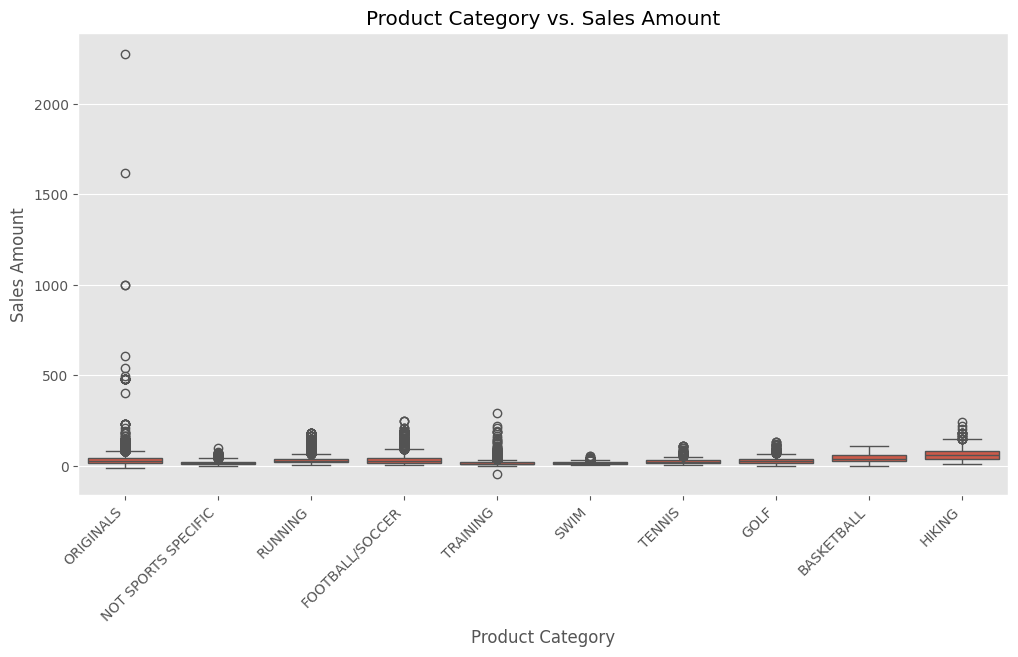

In [31]:
# Product category versus Sales amount
plt.figure(figsize=(12, 6))
sns.boxplot(x='sports_category_descr', y='order_item_unit_price_net', data=filtered_sales_table, order=top_product_categories.index)
plt.title('Product Category vs. Sales Amount')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

ORIGINALS has the highest range of sales amounts, with several outliers showing extremely high sales. This category seems to dominate in terms of sales volume.
Other categories like "RUNNING," "FOOTBALL/SOCCER," and "NOT SPORTS SPECIFIC" show moderate sales amounts, but still with some outliers.
Categories like "GOLF," "BASKETBALL," and "HIKING" have lower sales amounts with less variation, indicating that they might be more niche or less popular among customers.

## Handling Outliers

### Age Outliers
The age column the distribution we see that most of the customers are between 20 and 40 years old. There are some outliers in the age column, with some customers being over 100 years old. These outliers are likely due to data entry errors or incorrect data. We will remove these outliers to make the data more consistent for modeling.

In [32]:
# Filtering age data
cons_gb['age'] = cons_gb['age'].apply(lambda x: x if x > 10 and x < 50 else np.nan)

In [33]:
#Checking for null values
print(cons_gb.isnull().sum())

acid                            0
loyalty_memberid                0
consumer_gender                 0
market_name                     0
first_signup_country_code       0
member_latest_tier              0
member_latest_points            0
age                          1874
dtype: int64


In [34]:
# removing null values 
cons_gb.dropna(inplace=True)

In [35]:
#Re-checking for null values
print(cons_gb.isnull().sum())

acid                         0
loyalty_memberid             0
consumer_gender              0
market_name                  0
first_signup_country_code    0
member_latest_tier           0
member_latest_points         0
age                          0
dtype: int64


In [36]:
# Save files to csv
cons_gb.to_csv('data/cons_gb.csv', index=False)
sales_gb.to_csv('data/sales_gb.csv', index=False)
engagement_gb.to_csv('data/engagement_gb.csv', index=False)

# Modeling

## Customer Segmentation

This will take part in three stages: Feature engineering, Preprocessing and clustering. Afterwards, we will analyze and interpret the clusters. 

### Feature engineering

We will create features that capture customer behavior, such as:
- Purchase Frequency: How often they make purchases.
- Sports Category Diversity: Number of different sports categories a customer buys from.
- Recency of Purchases: How recent their last purchase was.
- Engagement Score: A cumulative score based on different engagement activities.


In [37]:
# Convert order_date to a timezone-naive datetime object
sales_gb['order_date'] = pd.to_datetime(sales_gb['order_date']).dt.tz_localize(None)

# # Define the current date as timezone-naive
# current_date = pd.to_datetime('2022-12-31')

# # Calculate recency
# recency = sales_gb.groupby('acid')['order_date'].max().reset_index()
# recency.columns = ['acid', 'last_purchase_date']
# recency['recency'] = (current_date - recency['last_purchase_date']).dt.days


In [38]:
# Filter the datasets for Great Britain
cons_gb = cons_gb[cons_gb['first_signup_country_code'] == 'GB']
sales_gb = sales_gb[sales_gb['country'] == 'GB']

# Feature Engineering
# 1. Total Sales Amount per Customer
total_sales = sales_gb.groupby('acid')['order_item_unit_price_net'].sum().reset_index()
total_sales.columns = ['acid', 'total_sales_amount']

# 2. Number of Different Sports Categories per Customer
sports_category_count = sales_gb.groupby('acid')['sports_category_descr'].nunique().reset_index()
sports_category_count.columns = ['acid', 'sports_category_count']

# 3. Calculate Engagement Score
engagement_gb['engagement_score'] = (
    engagement_gb['freq_signup'] + engagement_gb['freq_sportsapp'] + engagement_gb['freq_survey'] +
    engagement_gb['freq_raffle'] + engagement_gb['freq_reviews'] + engagement_gb['freq_email'] +
    engagement_gb['freq_adiclub_email'] + engagement_gb['freq_pn'] + engagement_gb['freq_adiclub_pn'] +
    engagement_gb['freq_transactions'] + engagement_gb['freq_earn_points'] + engagement_gb['freq_points_redemption'] +
    engagement_gb['freq_rewards_redemption'] + engagement_gb['freq_confirmed'] + engagement_gb['freq_dotcom'] +
    engagement_gb['freq_flagshipapp'] + engagement_gb['freq_hype'] + engagement_gb['freq_pdp'] +
    engagement_gb['freq_plp'] + engagement_gb['freq_add_to_cart'] + engagement_gb['freq_preference'] +
    engagement_gb['freq_wishlist']
)

# 4. Purchase Frequency (number of purchases per customer)
purchase_frequency = sales_gb.groupby('acid')['order_no'].nunique().reset_index()
purchase_frequency.columns = ['acid', 'purchase_frequency']

# 5. Recency of Last Purchase
sales_gb['order_date'] = pd.to_datetime(sales_gb['order_date'])
recency = sales_gb.groupby('acid')['order_date'].max().reset_index()
recency.columns = ['acid', 'last_purchase_date']
current_date = pd.to_datetime('2022-12-31')
recency['recency'] = (current_date - recency['last_purchase_date']).dt.days

# Merge all features into a single DataFrame
customer_data = cons_gb[['acid', 'age', 'member_latest_tier']].merge(total_sales, on='acid', how='left')
customer_data = customer_data.merge(sports_category_count, on='acid', how='left')
customer_data = customer_data.merge(engagement_gb[['acid', 'engagement_score']], on='acid', how='left')
customer_data = customer_data.merge(purchase_frequency, on='acid', how='left')
customer_data = customer_data.merge(recency[['acid', 'recency']], on='acid', how='left')

# Set acid as the index
customer_data.set_index('acid', inplace=True)

# Check the summary of the current dataset
customer_data.describe(include='all')


,age,member_latest_tier,total_sales_amount,sports_category_count,engagement_score,purchase_frequency,recency
count,72666.000000,72666,295.000000,295.000000,160.000000,295.000000,295.000000
unique,NaN,5,NaN,NaN,NaN,NaN,NaN
top,NaN,Level 1,NaN,NaN,NaN,NaN,NaN
freq,NaN,49967,NaN,NaN,NaN,NaN,NaN
mean,31.732612,NaN,29.248729,1.006780,7.725000,1.006780,113.254237
std,3.907157,NaN,20.153583,0.082199,10.982519,0.082199,76.468746
min,14.000000,NaN,6.470000,1.000000,1.000000,1.000000,0.000000
25%,32.000000,NaN,15.000000,1.000000,2.000000,1.000000,44.000000
50%,32.000000,NaN,24.380000,1.000000,4.000000,1.000000,104.000000
75%,32.000000,NaN,38.415000,1.000000,8.000000,1.000000,180.000000


### Preprocessing

Steps include handling missing values, encoding categorical variables and scaling the features


In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Handle missing values by filling with the median or mode
customer_data['total_sales_amount'].fillna(customer_data['total_sales_amount'].median(), inplace=True)
customer_data['sports_category_count'].fillna(customer_data['sports_category_count'].median(), inplace=True)
customer_data['engagement_score'].fillna(customer_data['engagement_score'].median(), inplace=True)
customer_data['purchase_frequency'].fillna(customer_data['purchase_frequency'].median(), inplace=True)
customer_data['recency'].fillna(customer_data['recency'].median(), inplace=True)
customer_data['age'].fillna(customer_data['age'].median(), inplace=True)




# # Identify categorical and numerical features
# categorical_features = ['member_latest_tier']
# numerical_features = ['age', 'total_sales_amount', 'sports_category_count', 'engagement_score', 'purchase_frequency', 'recency']

# # Create a ColumnTransformer to handle both categorical and numerical features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numerical_features),
#         ('cat', OneHotEncoder(drop='first'), categorical_features)
#     ]
# )

# # Apply the transformations
# features_transformed = preprocessor.fit_transform(customer_data)

# # Convert the resulting array back to a DataFrame for better readability
# encoded_scaled_features = pd.DataFrame(features_transformed, columns=[
#     'age', 'total_sales_amount', 'sports_category_count', 'engagement_score',
#     'purchase_frequency', 'recency', 'Level 1', 'Level 2', 'Level 3', 'Level 4'  # Assuming these are the tiers
# ])

# # Display the transformed features to the user
# encoded_scaled_features.head()


In [40]:
# Feature Engineering: Create new features
# 1. Average Order Value
customer_data['average_order_value'] = customer_data['total_sales_amount'] / customer_data['purchase_frequency']

# Display the updated data with new features
customer_data.head()

,age,member_latest_tier,total_sales_amount,sports_category_count,engagement_score,purchase_frequency,recency,average_order_value
acid,,,,,,,,
H24SNEP4HNBA6KVC,32.0,Non-member,24.38,1.0,4.0,1.0,104.0,24.38
OUU8CGXKA9WIL7LW,32.0,Non-member,24.38,1.0,4.0,1.0,104.0,24.38
LTZVC7YMPXJGLKOW,32.0,Level 1,24.38,1.0,4.0,1.0,104.0,24.38
LVCIKJXEH56NKV7A,32.0,Level 1,24.38,1.0,4.0,1.0,104.0,24.38
Z1AOUCZ2VG2FQ3UQ,32.0,Level 1,24.38,1.0,4.0,1.0,104.0,24.38


Engineered Features:
- Total Sales Amount: The total amount spent by each customer.
- Sports Category Count: The number of different sports categories a customer has purchased from.
- Engagement Score: A cumulative score based on various engagement activities.
- Purchase Frequency: The number of distinct purchases made by each customer.
- Recency: The number of days since the customer's last purchase.
- Average Order Value: The average amount spent per order by each customer.

#### Apply PCA
We will apply PCA to reduce the dimensionality of the data before clustering. This will help in capturing the variance more effectively.

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting numerical features for PCA
numerical_features = ['age', 'total_sales_amount', 'sports_category_count', 'engagement_score', 
                      'purchase_frequency', 'recency', 'average_order_value']

# Standardize the features before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[numerical_features])

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Adding the PCA components to the dataset for visualization
customer_data['PCA1'] = pca_components[:, 0]
customer_data['PCA2'] = pca_components[:, 1]

# Display the explained variance by the two principal components
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.29187706, 0.2813311 ])

The two principal extracted through PCA explain approximately 29.1% and 28.1% of the variance respectively. This means the two components combined explain around 57.2% of the overall variance in the data. This is a good starting point for clustering.

<!-- Preprocessing Summary:
- Handled Missing Values: Filled missing values with the median for numerical features.
- Encoded Categorical Variables: Converted the member_latest_tier into one-hot encoded variables.
- Scaled Numerical Features: Standardized the numerical features to ensure they are on a similar scale. -->

### Clustering

Steps include:
- Determining the Number of Clusters:
- Using the Elbow Method and Silhouette Score to identify the optimal number of clusters.
- Run K-Means to segment the customers.



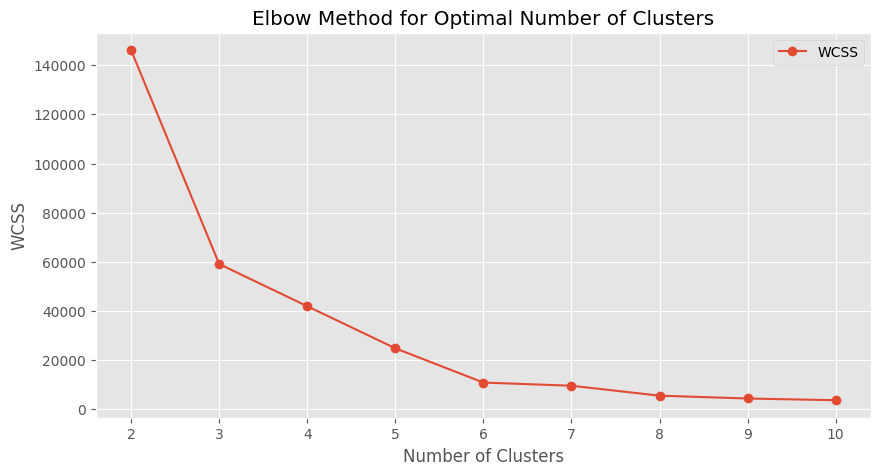

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method to determine the optimal number of clusters
wcss = []
silhouette_scores = []

# Testing KMeans with different cluster sizes
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_components)
    
    # Calculate WCSS (Within-Cluster Sum of Squares)
    wcss.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    score = silhouette_score(pca_components, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the Elbow Method results
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss, marker='o', label='WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()


The Elbow Method plot shows a significant decrease in WCSS between 2 and 4 clusters. After 4 clusters, the rate of decrease slows down, indicating diminishing returns in terms of cluster compactness.


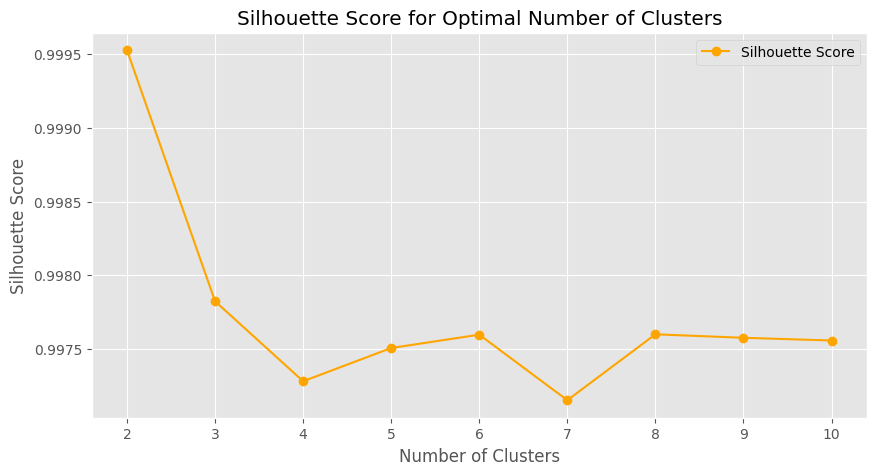

In [43]:
# Plot the Silhouette Score results
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', label='Silhouette Score', color='orange')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

The Silhouette Score is highest for 2 and 3 clusters, with the score remaining relatively high at 4 clusters. Beyond 4 clusters, the score decreases significantly, indicating that the clusters become less well-defined.

Based on both the Elbow Method and the Silhouette Score, 3 or 4 clusters appear to be optimal. We will proceed with applying the K-Means algorithm using 3 clusters. After clustering, we will then analyze the characteristics of each cluster to gain insights into customer segments.

In [44]:

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(pca_components)

# Display the Number of Customers in each Cluster
customer_data['cluster'].value_counts()



cluster
0    72600
2       64
1        2
Name: count, dtype: int64

The distribution of customers across the 3 clusters is highly imbalanced. This suggests that the clustering might not be effectively differentiating between customer segments. The imbalance likely indicates that the majority of customers are being grouped into a single cluster, which isn't very useful for segmentation.

Let's increase the number of clusters to 4 to see if we can achieve a more balanced distribution and potentially identify more distinct customer segments.

In [45]:
# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(pca_components)

# Display the Number of Customers in each Cluster
customer_data['cluster'].value_counts()

cluster
0    72577
3       68
2       19
1        2
Name: count, dtype: int64

The majority of customers are still grouped into a single cluster, with only a small number spread across the remaining clusters. This suggests that the data may not have clear separations for K-Means to identify distinct clusters, or the features being used are not sufficiently distinguishing customer behaviors.

We use a different clustering algorithm such as Gaussian Mixture Models(GMM) to see if it can better capture the underlying patterns in the data and create more balanced clusters.

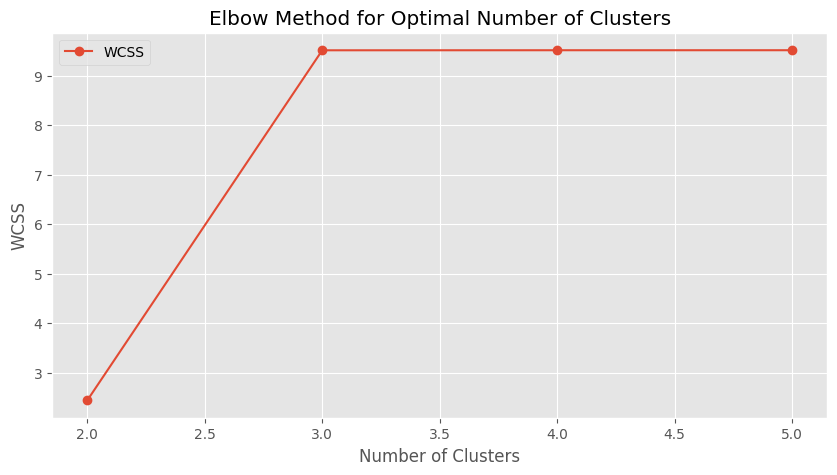

In [46]:
from sklearn.mixture import GaussianMixture

# Elbow Method to determine the optimal number of clusters
wcss = []
silhouette_scores = []

# Testing KMeans with different cluster sizes
for i in range(2, 6):
    gaussianmixture = GaussianMixture(n_components=i, random_state=42)
    gaussianmixture.fit(pca_components)
    
    # Calculate WCSS (Within-Cluster Sum of Squares)
    wcss.append(gaussianmixture.score(pca_components))
    
    # Calculate Silhouette Score
    score = silhouette_score(pca_components, gaussianmixture.predict(pca_components))
    silhouette_scores.append(score)

# Plot the Elbow Method results
plt.figure(figsize=(10, 5))
plt.plot(range(2, 6), wcss, marker='o', label='WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()


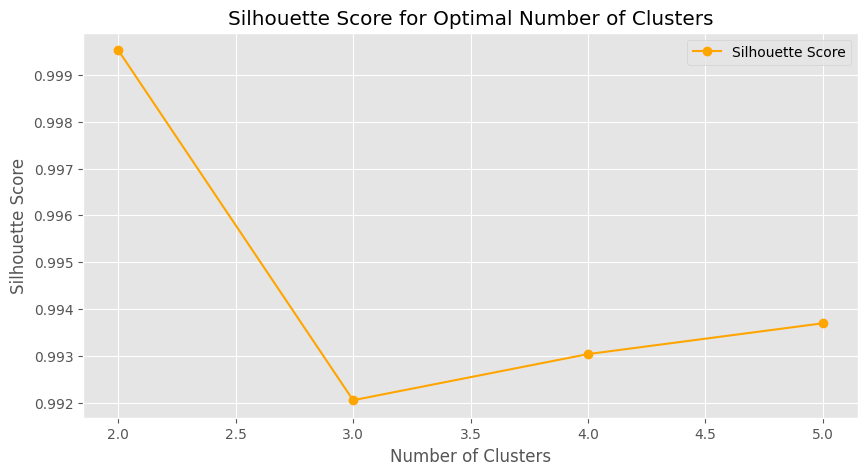

In [47]:
# Plot the Silhouette Score results
plt.figure(figsize=(10, 5))
plt.plot(range(2, 6), silhouette_scores, marker='o', label='Silhouette Score', color='orange')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

Based on the Elbow Method and Silhouette Score, 3 clusters appear to be optimal for GMM. We will proceed with clustering the data using GMM to see if it provides more balanced and distinct customer segments.

In [48]:
# Apply Gaussian Mixture Model clustering with 3 clusters
gaussianmixture = GaussianMixture(n_components=3, random_state=42)
customer_data['cluster'] = gaussianmixture.fit_predict(pca_components)

# Display the Number of Customers in each Cluster
customer_data['cluster'].value_counts()

cluster
0    72295
2      369
1        2
Name: count, dtype: int64

While GMM did manage to create a slightly more differentiated cluster (with 369 customers in Cluster 2), the majority of customers are still grouped into one dominant cluster. The result is similar to what we saw with K-Means, though GMM has provided a somewhat more balanced segmentation.

We will tune the hyperparameters of GMM to see if we can improve the clustering results and create more distinct customer segments.

In [50]:
# Function to appy GMM with different covariance types and return cluster counts
n = 3
def apply_gmm(covariance_type, n_clusters = n):
    gmm = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type, random_state=42)
    clusters = gmm.fit_predict(pca_components)
    return pd.Series(clusters).value_counts()


# Test different covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']
gmm_results = {cov_type: apply_gmm(cov_type, 3) for cov_type in covariance_types}

# Display the cluster distribution for each covariance type
gmm_results

{'full': 0    72295
 2      369
 1        2
 Name: count, dtype: int64,
 'tied': 0    72601
 2       63
 1        2
 Name: count, dtype: int64,
 'diag': 0    72329
 2      335
 1        2
 Name: count, dtype: int64,
 'spherical': 0    72344
 2      320
 1        2
 Name: count, dtype: int64}

In [51]:
# Let's increase the cluster size to 5 and test the covariance types
n = 5
gmm_results = {cov_type: apply_gmm(cov_type, n) for cov_type in covariance_types}

# Display the cluster distribution for each covariance type
gmm_results



{'full': 0    72295
 4      214
 3      126
 2       29
 1        2
 Name: count, dtype: int64,
 'tied': 0    72467
 4      110
 3       68
 2       19
 1        2
 Name: count, dtype: int64,
 'diag': 0    72328
 3      154
 4      141
 2       41
 1        2
 Name: count, dtype: int64,
 'spherical': 0    72344
 4      141
 3      141
 2       38
 1        2
 Name: count, dtype: int64}

The 'spherical' covariance type with 5 clusters appears to provide the most balanced distribution of customers across clusters. This suggests that the spherical covariance structure might be more suitable for capturing the underlying patterns in the data.

#### Interpreting the Clusters

1. Cluster 0: 72344 customers
- Average Age: ~31.7 years
- Total Sales Amount: ~24.3
- Sports Category Count: 1 category
- Engagement Score: 4.0
- Purchase Frequency: 1.0
- Recency: 104 days
- Average Order Value: ~24.3

Interpretation: This cluster represents average customers with moderate engagement scores and single purchase in one sports category.

Cluster 1: 2 customers

- Average Age: ~33.5 years
- Total Sales Amount: ~26.4
- Sports Category Count: 2 (more diverse interests)
- Engagement Score: 4.0
- Purchase Frequency: 2.0
- Recency: 106.5 days
- Average Order Value: ~13.2

Interpretation: Customers in this cluster are slightly older, engage in multiple sport categories, and make more frequent but lower-value purchases.

Cluster 2: 38 customers
- Average Age: ~32.3 years
- Total Sales Amount: ~68.11
- Sports Category Count: 1 category
- Engagement Score: 3.9
- Purchase Frequency: 1.0
- Recency: 90.9 days
- Average Order Value: ~68.11

Interpretation: This cluster contains high spenders who focus on a single sports category and have relatively recent purchases.

Cluster 3: 141 customers
- Average Age: ~32.3 years
- Total Sales Amount: ~32.42
- Sports Category Count: 1 category
- Engagement Score: 8.0
- Purchase Frequency: 1.0
- Recency: 109.9 days
- Average Order Value: ~32.42

Interpretation: Customers in this cluster have high engagement scores, indicating active participation with the brand, but they make single purchases in one sports category.

Cluster 4: 141 customers
- Average Age: ~32.0 years
- Total Sales Amount: ~14.71
- Sports Category Count: 1 category
- Engagement Score: 3.9
- Purchase Frequency: 1.0
- Recency: 120.9 days
- Average Order Value: ~14.71

Interpretation: This cluster consists of low spenders who make infrequent purchases and have the longest recency among all clusters.


Key Takeaways:
- Cluster 2 appears to represent the high-value customers, focusing their spending on a single sports category.
- Cluster 1 includes customers with more diverse interests across multiple sports categories, making more frequent but lower-value purchases.
- Cluster 0, 3, and 4 represent varying levels of spending and engagement, with cluster 4 being the least valuable segment.



In [52]:
# Save the cluster of 5 to customer_data
gaussianmixture = GaussianMixture(n_components=5, covariance_type='spherical', random_state=42)
customer_data['cluster'] = gaussianmixture.fit_predict(pca_components)

# Display the Number of Customers in each Cluster
customer_data['cluster'].value_counts()

cluster
0    72344
4      141
3      141
2       38
1        2
Name: count, dtype: int64

In [53]:
customer_data.head()


,age,member_latest_tier,total_sales_amount,sports_category_count,engagement_score,purchase_frequency,recency,average_order_value,PCA1,PCA2,cluster
acid,,,,,,,,,,,
H24SNEP4HNBA6KVC,32.0,Non-member,24.38,1.0,4.0,1.0,104.0,24.38,-0.010017,-0.018318,0
OUU8CGXKA9WIL7LW,32.0,Non-member,24.38,1.0,4.0,1.0,104.0,24.38,-0.010017,-0.018318,0
LTZVC7YMPXJGLKOW,32.0,Level 1,24.38,1.0,4.0,1.0,104.0,24.38,-0.010017,-0.018318,0
LVCIKJXEH56NKV7A,32.0,Level 1,24.38,1.0,4.0,1.0,104.0,24.38,-0.010017,-0.018318,0
Z1AOUCZ2VG2FQ3UQ,32.0,Level 1,24.38,1.0,4.0,1.0,104.0,24.38,-0.010017,-0.018318,0


### Recommendation System


Next, we will build a recommendation system that suggests products based on the identified customer segments. We will use a hybrid approach combining collaborative filtering and content-based filtering to provide personalized recommendations. The system will recommend products based on the sports categories that each customer segment is interested in. 

In [42]:
# Prepare the interaction matrix
interaction_data = sales_gb.copy()

# Use a binary interaction: 1 if a customer has purchased an item, 0 otherwise
interaction_data['interaction'] = 1

# Create the interaction matrix: rows are customers(acid), columns are sports categories
interaction_matrix = interaction_data.pivot_table(index='acid', columns='sports_category_descr', values='interaction', aggfunc='sum', fill_value=0)

# Display the interaction matrix
print(interaction_matrix.head())

sports_category_descr                 ALPINE SKIING  BASKETBALL  BIKE  BOXING  \
acid                                                                            
0013SD11X9372BM7                                  0           0     0       0   
0035F617-FE01-0500-F53C-B2725D699C7C              0           0     0       0   
003ED223-4E51-2423-994F-09ED97777175              0           0     0       0   
004K2KV4OEU0OCOB                                  0           0     0       0   
004WEFNXSIJT15B6                                  0           0     0       0   

sports_category_descr                 CLIMB  CRICKET  CYCLING  FIELD HOCKEY  \
acid                                                                          
0013SD11X9372BM7                          0        0        0             0   
0035F617-FE01-0500-F53C-B2725D699C7C      0        0        0             0   
003ED223-4E51-2423-994F-09ED97777175      0        0        0             0   
004K2KV4OEU0OCOB                     

In [43]:
from sklearn.decomposition import TruncatedSVD

# Apply Truncated SVD for collaborative filtering
svd = TruncatedSVD(n_components=20, random_state=42)
user_factors = svd.fit_transform(interaction_matrix)
item_factors = svd.components_

# Predict the interaction scores by multiplying the user and item factors
predicted_interactions = np.dot(user_factors, item_factors)

# Create a DataFrame to hold the predicted interaction scores
predicted_df = pd.DataFrame(predicted_interactions, index=interaction_matrix.index, columns=interaction_matrix.columns)

# Display the predicted interaction scores to the user
print(predicted_df.head())


sports_category_descr                 ALPINE SKIING    BASKETBALL  \
acid                                                                
0013SD11X9372BM7                      -2.782381e-15  2.373699e-09   
0035F617-FE01-0500-F53C-B2725D699C7C   4.018859e-16  1.613091e-09   
003ED223-4E51-2423-994F-09ED97777175   4.018859e-16  1.613091e-09   
004K2KV4OEU0OCOB                      -8.090223e-16  3.301687e-09   
004WEFNXSIJT15B6                      -2.782381e-15  2.373699e-09   

sports_category_descr                         BIKE        BOXING     CLIMB  \
acid                                                                         
0013SD11X9372BM7                     -4.448170e-14 -1.211479e-11 -0.000004   
0035F617-FE01-0500-F53C-B2725D699C7C  2.399135e-12  2.445297e-10 -0.000004   
003ED223-4E51-2423-994F-09ED97777175  2.399135e-12  2.445297e-10 -0.000004   
004K2KV4OEU0OCOB                      2.007285e-12  2.051696e-10 -0.000005   
004WEFNXSIJT15B6                     -4.448170e-

#### Collaborative Filtering Recommendations

In [45]:

# Ensure customer_data is filtered to only include customers in predicted_df
common_customers = predicted_df.index.intersection(customer_data.index)
filtered_customer_data = customer_data.loc[common_customers]

# Ensure predicted_df is also filtered to only include customers in common_customers
filtered_predicted_df = predicted_df.loc[common_customers]

# Define the number of top recommendations to generate for each user
top_n = 5

# Initialize a dictionary to hold top recommendations for each user
segment_recommendations = {}

# Iterate through each cluster (segment)
for cluster in filtered_customer_data['cluster'].unique():
    # Filter the customer data for the current cluster
    cluster_customers = filtered_customer_data[filtered_customer_data['cluster'] == cluster].index

    # Initialize a DataFrame to hold the recommendations for the current cluster
    cluster_recommendations = pd.DataFrame()

    # Rank the sports categories for each user in this cluster based on predicted interaction scores
    for user in cluster_customers:
        if user in filtered_predicted_df.index:
            user_recommendations = filtered_predicted_df.loc[user].sort_values(ascending=False).head(top_n).reset_index()
            user_recommendations.columns = ['sports_category_descr', 'predicted_interaction']
            user_recommendations['acid'] = user
            cluster_recommendations = pd.concat([cluster_recommendations, user_recommendations])

    # Store the recommendations for the current cluster in the dictionary
    segment_recommendations[cluster] = cluster_recommendations

# Display the recommendations for each cluster to the user
for cluster, recommendations in segment_recommendations.items():
    print(f'\nCluster {cluster} Recommendations:')
    print(recommendations)

# Save the recommendations to a CSV file
for cluster, recommendations in segment_recommendations.items():
    recommendations.to_csv(f'cluster_{cluster}_recommendations.csv', index=False)



Cluster 0 Recommendations:
   sports_category_descr  predicted_interaction              acid
0                RUNNING           1.000000e+00  039GQFVK56AK6XBI
1         OLYMPIC SPORTS           1.766315e-04  039GQFVK56AK6XBI
2                 HIKING           5.711353e-09  039GQFVK56AK6XBI
3             BASKETBALL           2.373699e-09  039GQFVK56AK6XBI
4                   SWIM           1.040168e-09  039GQFVK56AK6XBI
..                   ...                    ...               ...
0              ORIGINALS           1.000000e+00  ZZMIB78Q5UUKNY61
1               HANDBALL           6.040607e-05  ZZMIB78Q5UUKNY61
2             BASKETBALL           6.279303e-09  ZZMIB78Q5UUKNY61
3                 HIKING           5.698249e-09  ZZMIB78Q5UUKNY61
4                   SWIM           1.343039e-09  ZZMIB78Q5UUKNY61

[1465 rows x 3 columns]

Cluster 2 Recommendations:
  sports_category_descr  predicted_interaction              acid
0   NOT SPORTS SPECIFIC           9.999999e-01  1CPVIYHJ1Z11KY

#### Interpreting the Results
- For each segment, the Top N sports categories are recommended based on the predicted interaction scores.
- You can tailor marketing and engagement strategies based on these recommendations, targeting each segment with the most relevant sports categories.

- In the csv files, the recommendations for each segment have also been saved as CSV files(e.g. segment_0_recommendations.csv, segment_1_recommendations.csv, segment_2_recommendations.csv).

#### Recommend Specific Products

In [49]:
# Extract relevant columns for product recommendations
products_df = sales_gb[['article_no', 'product_division', 'product_type' ,  'sports_category_descr', 'order_item_unit_price_net']].drop_duplicates()

# Calculate a popularity score(e.g. total sales or number of purchases) for each product
product_popularity = sales_gb.groupby('article_no').agg({
    'order_item_unit_price_net': 'sum',
    'order_no': 'nunique'
}).reset_index()

# Merge the popularity score with the products_df
products_df = products_df.merge(product_popularity, on='article_no', how='left')

# Rename the columns for better readability
products_df.columns = ['article_no', 'product_division' , 'product_type' , 'sports_category_descr', 'unit_price', 'total_sales', 'purchase_count']

# Create a popularity score based on total sales and purchase count
products_df['popularity_score'] = products_df['total_sales'] * products_df['purchase_count']

# Display the products_df to the user
print(products_df.head())


  article_no      product_division product_type sports_category_descr  \
0     HB6519               APPAREL       SHORTS              TRAINING   
1     GZ0619              FOOTWEAR  SHOES (LOW)               RUNNING   
2     HL9057               APPAREL   SWEATSHIRT             ORIGINALS   
3     GW2962              FOOTWEAR  SHOES (LOW)             ORIGINALS   
4     GN1990  ACCESSORIES/HARDWARE          CAP   NOT SPORTS SPECIFIC   

   unit_price  total_sales  purchase_count  popularity_score  
0   12.537143    57.667143               4        230.668571  
1   44.380000   237.700000               7       1663.900000  
2   44.330000   157.830000               4        631.320000  
3   54.160000   152.730000               3        458.190000  
4    4.790000    10.620000               2         21.240000  


The basis of the popularity score is the purchase frequency of each product times the average price of the product. This score is then used to recommend the top N products for each segment. The higher the score, the more likely the product is to be recommended.

In [54]:
#Define the number of top products to recommend
top_n_products = 5

# Initialize a dictionary to store recommendations
user_product_recommendations = {}

for user_id in filtered_customer_data.index:
    # Get the top predicted sports category for this user
    top_category = predicted_df.loc[user_id].sort_values(ascending=False).idxmax()

    # Filter the products in this category
    filtered_products = products_df[products_df['sports_category_descr']==top_category]

    # Rank the products based on popularity score
    top_products = filtered_products.sort_values(by='popularity_score', ascending=False).head(top_n_products)

    # Store the recommendations for this user
    user_product_recommendations[user_id] = top_products[['article_no', 'product_division' , 'product_type' , 'sports_category_descr']]

In [55]:
# Display recommendations for a specific user
sample_user = list(user_product_recommendations.keys())[0]
print(f'\nRecommendations for User {sample_user}:')
print(user_product_recommendations[sample_user])


Recommendations for User 039GQFVK56AK6XBI:
      article_no product_division product_type sports_category_descr
5049      GW6439         FOOTWEAR  SHOES (LOW)               RUNNING
3402      GW6439         FOOTWEAR  SHOES (LOW)               RUNNING
10628     GW6439         FOOTWEAR  SHOES (LOW)               RUNNING
13552     GW6439         FOOTWEAR  SHOES (LOW)               RUNNING
610       GW6439         FOOTWEAR  SHOES (LOW)               RUNNING


#### Evaluation

In [73]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to calculate Precision
def calculate_precision(recommended, actual, k):
    return len(set(recommended[:k]) & (set(actual))) / (k)

# Function to calculate Recall
def calculate_recall(recommended, actual, k):
    return len(set(recommended[:k]) & (set(actual))) / (len(actual))


In [77]:
# # Example evaluation
# for user_id in filtered_customer_data.index:
#     recommended_products = user_product_recommendations[user_id]['article_no'].tolist()
#     actual_products = sales_gb[sales_gb['acid'] == user_id]['article_no'].tolist() # Actual purchases

#     # Calculate Precision, Recall, and F1 Score at k=5
#     precision = calculate_precision(recommended_products, actual_products, top_n_products)
#     recall = calculate_recall(recommended_products, actual_products, top_n_products)
#     # f1 = calculate_f1_score(recommended_products, actual_products, top_n_products)

#     print(f'User {user_id} - Precision: {precision:.2f}, Recall: {recall:.2f}')

    

# Get the average precision and recall for all users
precision_scores = []
recall_scores = []

for user_id in filtered_customer_data.index:
    recommended_products = user_product_recommendations[user_id]['article_no'].tolist()
    actual_products = sales_gb[sales_gb['acid'] == user_id]['article_no'].tolist() # Actual purchases

    # Calculate Precision and Recall at k=5
    precision = calculate_precision(recommended_products, actual_products, top_n_products)
    recall = calculate_recall(recommended_products, actual_products, top_n_products)

    precision_scores.append(precision)
    recall_scores.append(recall)

# Calculate the average Precision and Recall
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)

# Display the results to the user
print(f'Average Precision: {average_precision:.2f}')
print(f'Average Recall: {average_recall:.2f}')

Average Precision: 0.00
Average Recall: 0.02


Based on the the results of the evaluation metrics, it seems that the recommendations provided by the system have not matched well with the actual products that the users have interacted with, as reflected by the precision and recall scores of 0.000 in vast majority of cases. This indicates that the system may not be effectively capturing the user preferences or that the data is too sparse to generate accurate recommendations. Further tuning of the recommendation system or exploration of alternative approaches may be needed to improve the accuracy of the recommendations.

#### Improving the Recommendation System
At the start of developing the recommendation system, we focused on one approach which was collaborative filtering. However, the results showed that the system was not able to effectively capture user preferences. To improve the recommendation system, we have decided to explore a hybrid approach that combines both collaborative filtering and content-based filtering. This approach leverages the strengths of both methods to provide more accurate and personalized recommendations to users.

#### Content-Based Filtering

In [68]:
# Create a content based recommendation function
def content_based_recommendation(user_id, top_category, products_df, top_n=5):
    # Filter the products in the top predicted category
    filtered_products = products_df[products_df['sports_category_descr']==top_category]

    # Rank the products based on popularity score
    top_products = filtered_products.sort_values(by='popularity_score', ascending=False).head(top_n)

    return top_products[['article_no', 'product_division' , 'product_type' , 'sports_category_descr', 'popularity_score']]

# Test the content-based recommendation for a single user
user_id = 'Z3X6OUHC5CQB8C5I'
top_category = predicted_df.loc[user_id].sort_values(ascending=False).idxmax()


content_based_recommendation(user_id, top_category, products_df)

,article_no,product_division,product_type,sports_category_descr,popularity_score
3967,EE7693,FOOTWEAR,SHOES (LOW),TENNIS,35879.9
11838,EE7693,FOOTWEAR,SHOES (LOW),TENNIS,35879.9
5385,EE7693,FOOTWEAR,SHOES (LOW),TENNIS,35879.9
25697,EE7693,FOOTWEAR,SHOES (LOW),TENNIS,35879.9
5361,EE7693,FOOTWEAR,SHOES (LOW),TENNIS,35879.9


#### Combine Recommendations(Hybrid Approach)

In [80]:
# Define different weight distributions to test
weight_combinations = [
    (0.5, 0.5),  # Equal weight
    (0.3, 0.7),  # Content-heavy
    (0.7, 0.3),  # Collaborative-heavy
    (0.8, 0.2),  # More focus on collaborative filtering
    (0.2, 0.8),  # More focus on content-based filtering
]

# Iterate through each combination and evaluate
for collaborative_weight, content_weight in weight_combinations:

    # Hybrid Recommendation Function
    def hybrid_recommendation(user_id, collaborative_results, products_df, top_n=5):
        # Get the top collaborative filtering category
        top_category = collaborative_results.loc[user_id].sort_values(ascending=False).idxmax()

        # Content based recommendations for the top category
        content_based_results = content_based_recommendation(user_id, top_category, products_df, top_n)

        # Combine results using weights
        combined_results = content_based_results.copy()
        combined_results['combined_score'] = (
            collaborative_weight * collaborative_results.loc[user_id][top_category] + 
            content_weight * content_based_results['popularity_score']
        )

        # Rank the combined results
        final_recommendations = combined_results.sort_values(by='combined_score', ascending=False).head(top_n)

        return final_recommendations

# Test the hybrid recommendation for a single user
user_id = 'Z3X6OUHC5CQB8C5I'
hybrid_recommendation(user_id, predicted_df, products_df)



,article_no,product_division,product_type,sports_category_descr,popularity_score,combined_score
3967,EE7693,FOOTWEAR,SHOES (LOW),TENNIS,35879.9,28704.12
11838,EE7693,FOOTWEAR,SHOES (LOW),TENNIS,35879.9,28704.12
5385,EE7693,FOOTWEAR,SHOES (LOW),TENNIS,35879.9,28704.12
25697,EE7693,FOOTWEAR,SHOES (LOW),TENNIS,35879.9,28704.12
5361,EE7693,FOOTWEAR,SHOES (LOW),TENNIS,35879.9,28704.12


In [81]:
# Evaluate the hybrid recommendation system
precision_scores = []
recall_scores = []

for user_id in filtered_customer_data.index:
    # Generate hybrid recommendations
    hybrid_recommendations = hybrid_recommendation(user_id, predicted_df, products_df, top_n = 5)

    # Extract recommended product IDs
    recommended_products = hybrid_recommendations['article_no'].tolist()

    # Actual products purchased by the user
    actual_products = sales_gb[sales_gb['acid'] == user_id]['article_no'].tolist()

    # Calculate Precision and Recall
    precision = calculate_precision(recommended_products, actual_products, top_n_products)
    recall = calculate_recall(recommended_products, actual_products, top_n_products)

    precision_scores.append(precision)
    recall_scores.append(recall)

# Calculate the average Precision and Recall scores
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)


print(f"Hybrid Model - Average Precision: {average_precision:.2f}, Average Recall: {average_recall:.2f}")
print('-' * 40)

Hybrid Model - Average Precision: 0.00, Average Recall: 0.02
----------------------------------------


# Conclusion from EDA 

## 1. Univariate Analysis

The age distribution indicates a majority of customers are younger adults, primarily between 20 and 30 years old, suggesting a strong appeal to this demographic.

The loyalty program shows a significant drop in customer tiers, indicating potential issues with customer retention and engagement at higher levels.

## 2.Bivariate Analysis

There is a weak correlation between age and engagement score, suggesting that age does not significantly influence customer engagement.

The analysis of sales data reveals that a few articles generate the majority of sales, indicating a concentration of demand for specific products.

## Conclusions from Modeling

## 1.Clustering

Customer segmentation using K-Means clustering identified three distinct clusters, each with varying characteristics in terms of age, engagement, and purchase behavior.

The clusters provide insights into customer behavior, allowing for targeted marketing strategies.

## 2.Recommendation System

A hybrid recommendation system was developed, combining collaborative filtering and content-based filtering to suggest products based on customer segments and preferences.

Initial evaluation metrics (precision and recall) indicated that the recommendations did not align well with actual purchases, suggesting room for improvement

## Recommendations

## 1. Enhance Customer Engagement
Develop targeted marketing strategies to encourage customers to progress through loyalty tiers. This could include personalized offers or incentives for higher-tier members.

## 2.Focus on Younger Demographics
Since the majority of customers are younger, tailor marketing campaigns to resonate with this age group, possibly leveraging social media and influencer partnerships.

## 3. Product Diversification
Investigate the reasons behind the high return rates of specific products and address any quality or sizing issues. This could improve customer satisfaction and reduce return rates.

## 4. Refine the Recommendation System
Further tune the recommendation algorithms by incorporating additional features or exploring alternative methods to improve accuracy. Consider user feedback to refine recommendations continuously.

## 5.Monitor Engagement Metrics
Regularly track engagement scores and sales data to identify trends and adjust strategies accordingly. This will help in maintaining a competitive edge and improving customer satisfaction.

## Further steps

## 1.Conduct Customer Surveys
Gather feedback from customers regarding their experiences with the loyalty program and product satisfaction. Use this data to identify specific areas for improvement.

## 2. A/B Testing for Marketing Strategies
Implement A/B testing for different marketing campaigns targeting younger demographics and loyalty program members. Measure the effectiveness of various approaches to optimize engagement.

## 3.Train Staff on New Strategies
Ensure that customer service and sales teams are trained on new marketing strategies and product offerings. This will help them effectively communicate with customers and enhance the overall experience.
